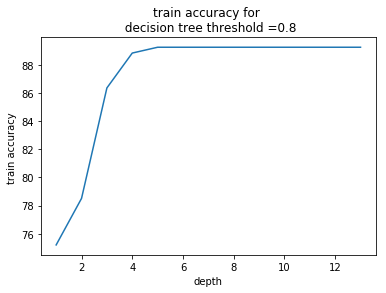

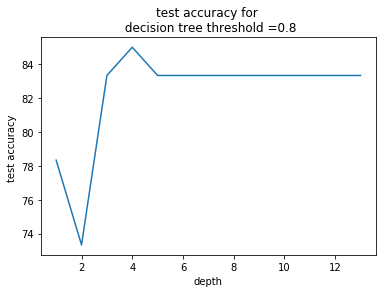

In [22]:
from utils import Utils
from DecisionTree import DecisionTree

util = Utils()
# read data
X,Y = util.read_data()

# shuffle data
X_sh, Y_sh = util.shuffle_data(X,Y)

#split data
X_train, X_test = util.split_data(X_sh,80)
Y_train, Y_test = util.split_data(Y_sh,80)

# shuffle again ,not necessary
X_train_sh, Y_train_sh = util.shuffle_data(X_train,Y_train)
X_test_sh, Y_test_sh = util.shuffle_data(X_test,Y_test)


# for DecisionTree
# tre = [0.75,0.8,0.85,0.9,0.95,1]
tre = [0.8]
for t in tre :
    acc = []
    de = [1,2,3,4,5,6,7,8,9,10,11,12,13]
    for i in de :
        d = DecisionTree(i,t)
        tree = d.fit(X_train_sh,Y_train_sh)
        predicted_train_Y = d.predict(X_train_sh,tree)
        acc_train = util.calculate_accuracy(predicted_train_Y,Y_train_sh)
        acc.append(acc_train)
    util.plot(de,acc,t,"train",0)

    acc = []
    for i in de :
        d = DecisionTree(i,t)
        tree = d.fit(X_train_sh,Y_train_sh)
        predicted_test_Y = d.predict(X_test_sh,tree)
        acc_test = util.calculate_accuracy(predicted_test_Y,Y_test_sh)
        acc.append(acc_test)
    util.plot(de,acc,t,"test",0)




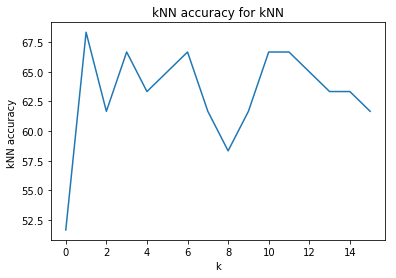

In [4]:
from kNN import kNN

# kNN
k = [i for i in range(16)]
acc_knn = []
for i in k:
    KNN = kNN(i)
    KNN.fit(X_train_sh, Y_train_sh)
    predicted_y_kNN = KNN.predict(X_test_sh)
    acc = util.calculate_accuracy(predicted_y_kNN, Y_test_sh)
    acc_knn.append(acc)

util.plot(k,acc_knn,"","kNN",1)

نمودار کا نزدیک ترین همسایه در شکل بالا برای 15 همسایه قابل مشاهده است. بهترین دقت برای کا برابر با 1 است که دقت برابر67.5 درصد است ولی باز هم به همان دلایل قبل نمی توان فقط به این دقت اکتفا کرد

In [3]:
# 5 fold for decesion tree with threshold = 0.8

threshold = 0.8
de = [1,2,3,4,5,6,7,8,9,10,11,12,13]
mean_acc = []
for i in de :
    acc = []
    k_fold = 5
    for iteration in range(k_fold):
        X_train, X_test = util.k_fold(X_sh, 5, iteration)
        Y_train, Y_test = util.k_fold(Y_sh, 5, iteration)
        d = DecisionTree(i,threshold)
        tree = d.fit(X_train,Y_train)
        predicted_test_Y = d.predict(X_test,tree)
        acc_test = util.calculate_accuracy(predicted_test_Y,Y_test)
        acc.append(acc_test)

    mean_acc.append(sum(acc)/5)

print(mean_acc)


[70.77011494252874, 72.11494252873563, 73.79310344827586, 74.01948178453145, 73.00214299629846, 73.663159945451, 73.32982661211767, 73.32982661211767, 73.67465419832456, 73.32982661211767, 73.32982661211767, 73.32982661211767, 73.32982661211767]


طبق ۵ فولد که در بالا مشاهده می کنیم بهترین دقت در حد آستانه ی ۰.۸ برابر 74 درصد است که مربوط به عمق ۴ می باشد که این عمق را برای بهترین درخت انتخاب می کنیم.

In [5]:
# 5 fold for kNN 

from kNN import kNN

mean_acc = []
k = [i for i in range(16)]
for i in k:
    acc = []
    k_fold = 5
    for iteration in range(k_fold):
        X_train, X_test = util.k_fold(X_sh, 5, iteration)
        Y_train, Y_test = util.k_fold(Y_sh, 5, iteration)
        KNN = kNN(i)
        KNN.fit(X_train, Y_train)
        predicted_y_kNN = KNN.predict(X_test)
        acc_test = util.calculate_accuracy(predicted_y_kNN, Y_test)
        acc.append(acc_test)
        
    mean_acc.append(sum(acc)/5)

print(mean_acc)


[54.0, 62.333333333333336, 61.33333333333333, 66.0, 67.33333333333333, 70.00000000000001, 68.33333333333333, 67.66666666666666, 65.66666666666666, 67.33333333333333, 66.33333333333334, 68.66666666666666, 67.66666666666667, 69.99999999999999, 69.66666666666666, 68.66666666666667]


همانطور که در بالا میبینیم بهترین دقت برای 5 فولد الگوریتم کا نزدیک ترین همسایه برابر 70 درصد است که در 6 همسایه رخ می دهد.

In [10]:
#for decesion tree with threshold = 0.8 and depth = 4

d = DecisionTree(4,0.8)
tree = d.fit(X_train,Y_train)
predicted_tree_Y = d.predict(X_test,tree)
acc_test = util.calculate_accuracy(predicted_tree_Y,Y_test)
TP, TN, FP, FN = util.calculate_confusion_matrix(predicted_tree_Y, Y_test)
specificity, precision, recall, F1, acc = util.calculate_classification_reports(predicted_tree_Y, Y_test)
print(TP, TN, FP, FN)
print(specificity, precision, recall, F1, acc)

27 17 11 5
0.6071428571428571 0.7105263157894737 0.84375 2.53125 73.33333333333333


#calssification report for decesion tree

TP = 29 TN = 21 FP = 7 FN = 3
specificity = 0.75 precision = 0.8055555555555556 recall = 0.90625 F1 = 2.71875 acc = 83.33333333333334
مقادیر خواسته شده به صورت بالا است.(امکان دارد در هر بار اجزا این مقادیر متفاوت شوند.)

In [19]:
#for kNN with k = 15

KNN = kNN(1)
KNN.fit(X_train, Y_train)
predicted_y_kNN = KNN.predict(X_test)
TP, TN, FP, FN = util.calculate_confusion_matrix(predicted_y_kNN, Y_test)
specificity, precision, recall, F1, acc = util.calculate_classification_reports(predicted_y_kNN, Y_test)
print(TP, TN, FP, FN)
print(specificity, precision, recall, F1, acc)

19 19 9 13
0.6785714285714286 0.6785714285714286 0.59375 1.78125 63.33333333333333


#calssification report for kNN model

TP = 22 TN = 16 FP = 12 FN = 10
specificity = 0.57 precision = 0.64 recall = 0.68 F1 = 2.0625 acc = 63.33333333333334
مقادیر خواسته شده به صورت بالا است.(امکان دارد در هر بار اجزا این مقادیر متفاوت شوند.)

In [21]:
#t-test for comparison of two models

t_test_vector_dtree = []
for i,j in zip(Y_test,predicted_tree_Y) :
    if i == j : t_test_vector_dtree.append(1)
    else: t_test_vector_dtree.append(0)

t_test_vector_kNN = []
for i,j in zip(Y_test,predicted_y_kNN) :
    if i == j : t_test_vector_kNN.append(1)
    else: t_test_vector_kNN.append(0)

t,p = util.t_test(t_test_vector_kNN,t_test_vector_dtree)
print("t : ",t,"p : ",p)


t :  1.2684994714586635 p :  0.10480096665786387


همانطور که میبینیم با مقادیر ارتفاع 4 برای درخت و مقدار 6 برای نزدیک ترین همسایه به صورت بالا است که تقریبا تفاوت زیادی ندارند بر اساس مقدار پی به دست آمده که اگر حد آن را 0.1 درنظر بگیریم تفاوت معناداری در نتایج ندارند ولی اگر مقدار های مختلفی به عمق و یا کا بدیهم آن وقت تفاوت معناداری در نتیاج آن ها خواهیم دید مثلا برای کا برابر با یک نتایج متفاوت خواهد بود. در نهایت وقتی هر دو مدل را در بهترین حالت خود آموزش بدهیم در نتایجی که به دست می آوریم تفاوت معناداری نداریم ولی وقتی پارامتر ها را عوض می کنیم نتایج آن ها به ظور معناداری متفاوت خواهد بود.    